In [75]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(
    {
        'title': ['Мастер и Маргарита', 'Преступление и наказание', '1984', 'Три товарища', 
              'Маленький принц', 'Сто лет одиночества', 'Гарри Поттер и философский камень',
              'Война и мир', 'Анна Каренина', 'Шерлок Холмс', 'Убийство в Восточном экспрессе',
              'Дюна', 'Властелин колец', 'Гордость и предубеждение', 'Над пропастью во ржи',
              'Великий Гэтсби', 'Тёмные начала', 'Норвежский лес', 'Атлант расправил плечи',
              'Цветы для Элджернона'] * 5,
    
    'author': ['Булгаков', 'Достоевский', 'Оруэлл', 'Ремарк', 'Сент-Экзюпери',
               'Маркес', 'Роулинг', 'Толстой', 'Толстой', 'Конан Дойл',
               'Кристи', 'Герберт', 'Толкин', 'Остин', 'Сэлинджер',
               'Фицджеральд', 'Пулман', 'Мураками', 'Рэнд', 'Киз'] * 5,
    
    'genre': ['Классика', 'Классика', 'Антиутопия', 'Классика', 'Притча',
              'Магический реализм', 'Фэнтези', 'Классика', 'Классика', 'Детектив',
              'Детектив', 'Научная фантастика', 'Фэнтези', 'Роман', 'Классика',
              'Классика', 'Фэнтези', 'Роман', 'Философия', 'Научная фантастика'] * 5,
    
    'price': np.random.normal(500, 150, 100).round(2),
    'sales': np.random.poisson(25, 100),
    'date': pd.date_range(start='2024-01-01', end='2024-01-20', periods=100)
    }
)
df

,title,author,genre,price,sales,date
0,Мастер и Маргарита,Булгаков,Классика,526.19,18,2024-01-01 00:00:00.000000000
1,Преступление и наказание,Достоевский,Классика,358.57,25,2024-01-01 04:36:21.818181818
2,1984,Оруэлл,Антиутопия,380.72,30,2024-01-01 09:12:43.636363636
3,Три товарища,Ремарк,Классика,423.25,30,2024-01-01 13:49:05.454545454
4,Маленький принц,Сент-Экзюпери,Притча,749.11,30,2024-01-01 18:25:27.272727272
...,...,...,...,...,...,...
95,Великий Гэтсби,Фицджеральд,Классика,680.06,22,2024-01-19 05:34:32.727272727
96,Тёмные начала,Пулман,Фэнтези,552.48,21,2024-01-19 10:10:54.545454545
97,Норвежский лес,Мураками,Роман,588.09,33,2024-01-19 14:47:16.363636363
98,Атлант расправил плечи,Рэнд,Философия,525.85,26,2024-01-19 19:23:38.181818181


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   100 non-null    object        
 1   author  100 non-null    object        
 2   genre   100 non-null    object        
 3   price   100 non-null    float64       
 4   sales   100 non-null    int32         
 5   date    100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 4.4+ KB


In [6]:
df.describe()

,price,sales,date
count,100.000000,100.000000,100
mean,522.248100,24.380000,2024-01-10 12:00:00
min,168.400000,15.000000,2024-01-01 00:00:00
25%,408.687500,21.750000,2024-01-05 18:00:00
50%,525.800000,25.000000,2024-01-10 12:00:00
75%,627.890000,27.000000,2024-01-15 06:00:00
max,860.350000,37.000000,2024-01-20 00:00:00
std,149.581276,4.552233,NaN


In [13]:
df_titles = df['title'].unique()
len(df_titles)

20

In [11]:
#Видим, что всего 20 уникальных наименований книг, но в каждый день продаж цены отличаются.

In [44]:
sales_list = []
for title in df_titles:
    sales_volume = df[df['title']==title]['sales'].sum()
    sales_list.append([title,sales_volume])
sorted_list = sorted(sales_list,key= lambda x:x[1],reverse=True)
sorted_list[:5]

[['Норвежский лес', np.int64(151)],
 ['Три товарища', np.int64(135)],
 ['1984', np.int64(133)],
 ['Убийство в Восточном экспрессе', np.int64(129)],
 ['Маленький принц', np.int64(128)]]

title
Норвежский лес                    151
Три товарища                      135
1984                              133
Убийство в Восточном экспрессе    129
Маленький принц                   128
Name: sales, dtype: int32


<Axes: xlabel='Название', ylabel='Цена'>

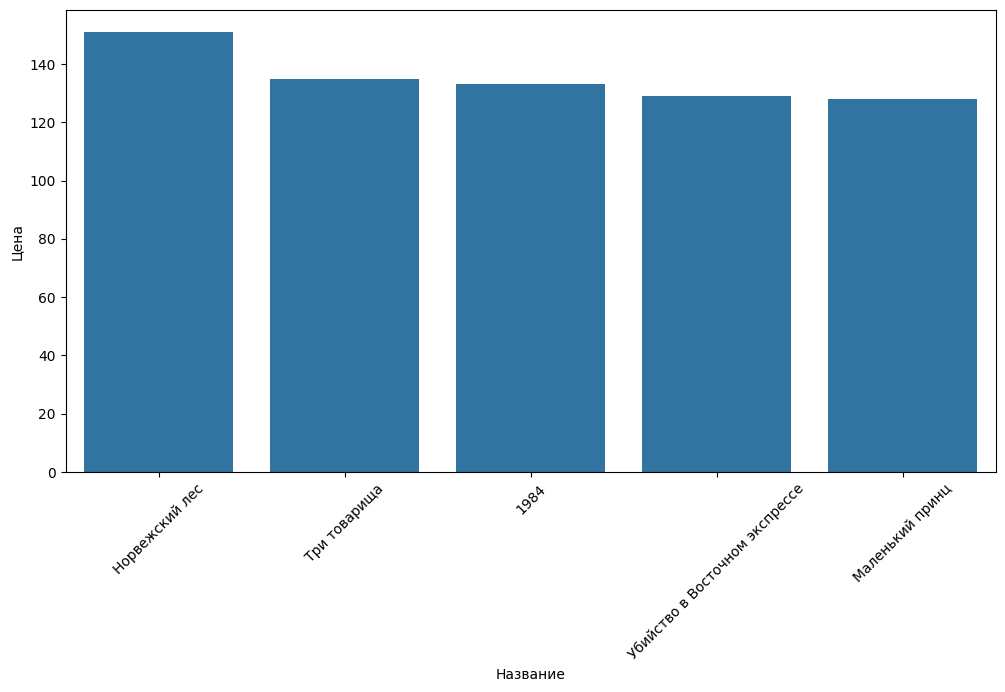

In [68]:
top_sales_books = df.groupby('title')['sales'].sum().sort_values(ascending=False).head(5)
print(top_sales_books)
plt.figure(figsize=(12,6))
plt.xlabel('Название')
plt.ylabel('Цена')
plt.xticks(rotation = 45)
sns.barplot(top_sales_books)

In [37]:
df_genre = df['genre'].unique()
df_genre

array(['Классика', 'Антиутопия', 'Притча', 'Магический реализм',
       'Фэнтези', 'Детектив', 'Научная фантастика', 'Роман', 'Философия'],
      dtype=object)

genre
Классика              424020.37
Фэнтези               176821.43
Роман                 145175.64
Детектив              133372.24
Научная фантастика    118101.92
Антиутопия             76589.20
Притча                 70761.70
Магический реализм     69169.30
Философия              60404.91
Name: revenue, dtype: float64


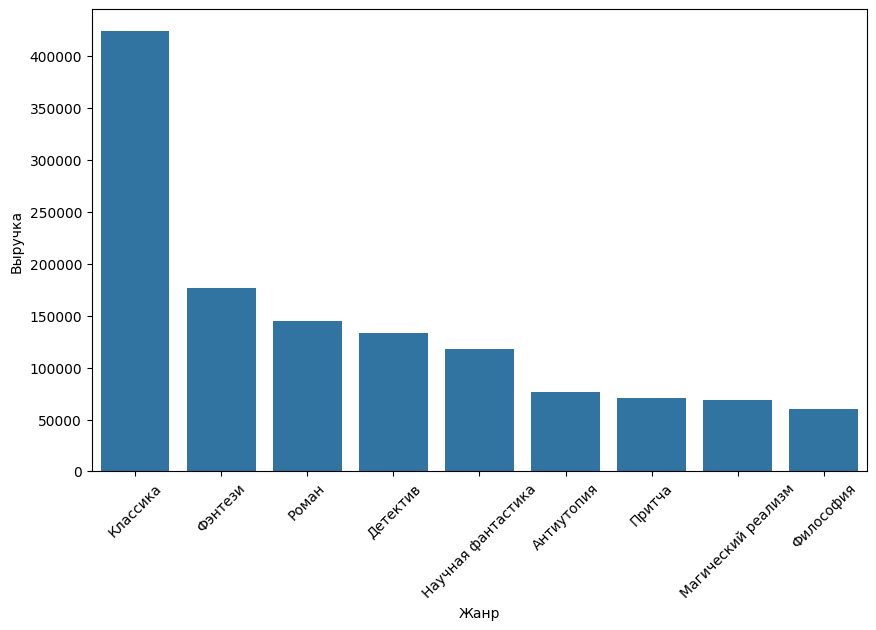

In [96]:
df['revenue'] = df['price']*df['sales']
sales_volume_per_genre = df.groupby('genre')['revenue'].sum().sort_values(ascending=False)
print(sales_volume_per_genre)
plt.figure(figsize=(10,6))
plt.xlabel('Жанр')
plt.ylabel('Выручка')
plt.xticks(rotation = 45)
sns.barplot(sales_volume_per_genre);



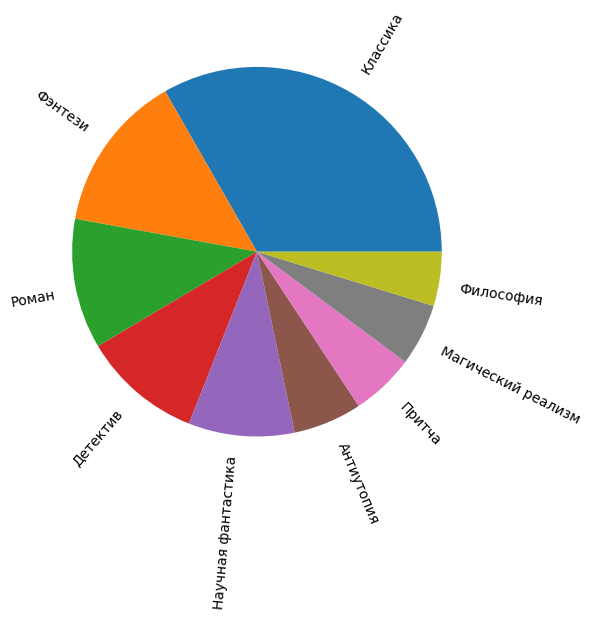

In [93]:
genres = sales_volume_per_genre.index.tolist()
revenue = sales_volume_per_genre.values.tolist()
plt.figure(figsize=(10,6))
plt.pie(revenue,labels=genres,rotatelabels=True);

<Axes: xlabel='Дата', ylabel='Выручка'>

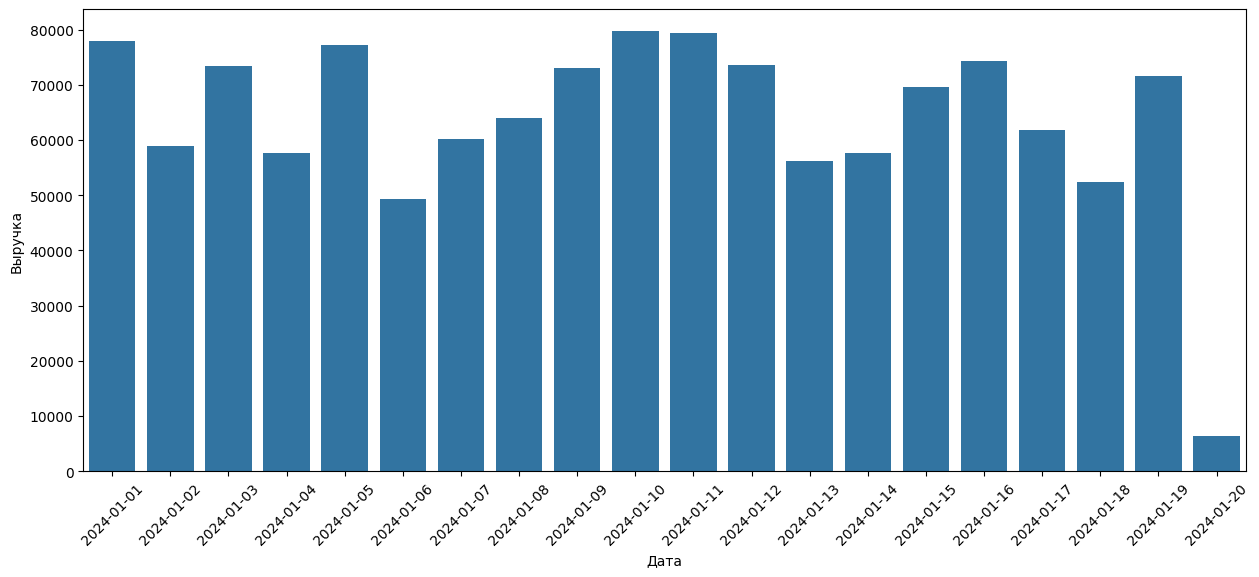

In [80]:
df['only_date'] = df['date'].dt.date
day_revenue = df.groupby('only_date')['revenue'].sum().sort_index()
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
sns.barplot(day_revenue)

In [103]:
author_avg_bill = (df.groupby('author')['revenue'].sum() / df.groupby('author')['sales'].sum()).sort_values()
author_avg_bill

author
Конан Дойл       438.658762
Толкин           444.228992
Роулинг          445.052261
Достоевский      468.123833
Герберт          469.485868
Рэнд             479.404048
Толстой          479.827130
Киз              482.630945
Булгаков         493.261818
Мураками         498.508940
Ремарк           518.505259
Сэлинджер        539.722718
Сент-Экзюпери    552.825781
Остин            554.768175
Маркес           562.352033
Оруэлл           575.858647
Пулман           622.027094
Фицджеральд      646.973500
Кристи           676.845504
dtype: float64